# Simulation study for Landweber
- dependence on condition number
- boxplot early stopping rules
- boxplot empirical error weak and strong

In [23]:
import EarlyStopping as es
import numpy as np
import matplotlib.pyplot as plt
import random, time
random.seed(42)

## Generate diagonal examples

In [24]:
# Create diagonal design matrices
D = 10000
indices = np.arange(D)+1
design_matrix = np.diag(1/(np.sqrt(indices)))
print(design_matrix)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.70710678 0.         ... 0.         0.         0.        ]
 [0.         0.         0.57735027 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.010001   0.         0.        ]
 [0.         0.         0.         ... 0.         0.0100005  0.        ]
 [0.         0.         0.         ... 0.         0.         0.01      ]]


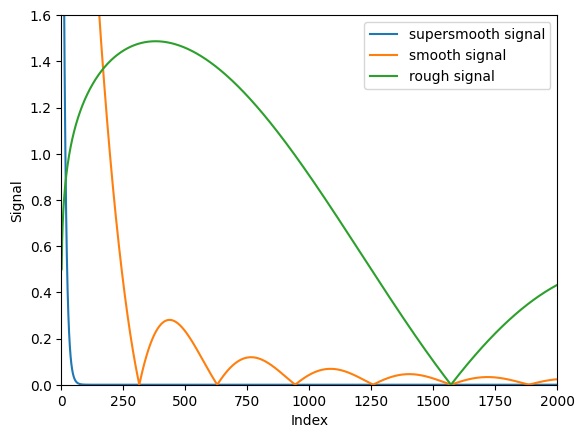

In [25]:
# Create signals from Stankewitz (2020)
signal_supersmooth = 5*np.exp(-0.1*indices)
signal_smooth = 5000*np.abs(np.sin(0.01*indices))*indices**(-1.6)
signal_rough = 250*np.abs(np.sin(0.002*indices))*indices**(-0.8)

plt.plot(indices, signal_supersmooth, label="supersmooth signal")
plt.plot(indices, signal_smooth, label="smooth signal")
plt.plot(indices, signal_rough, label="rough signal")
plt.ylabel("Signal")
plt.xlabel("Index")
plt.xlim([0,2000])
plt.ylim([0,1.6])
plt.legend()

## Monte-Carlo simulation

In [26]:
# Specify number of Monte-Carlo runs
number_runs = 1

# Create observations
noise_level = 0.01
noise = np.random.normal(0, noise_level, (D, number_runs))
observation_supersmooth = noise + np.matmul(design_matrix, signal_supersmooth)[:, None]
observation_smooth = noise + np.matmul(design_matrix, signal_smooth)[:, None]
observation_rough = noise + np.matmul(design_matrix, signal_rough)[:, None]    

In [27]:
# Create models
models_supersmooth = [es.landweber(design_matrix, observation_supersmooth[:, i]) for i in range(number_runs)]

In [28]:
# Caculate Landweber estimates after 1000 iterations
number_iterations = 1000
runtime_vec = []
for obj in models_supersmooth:
    start_time = time.time()
    obj.landw(number_iterations)
    end_time = time.time()
    runtime_vec.append(end_time - start_time)
print(runtime_vec)

[43.52576518058777]


Text(0.5, 0, 'Iteration index')

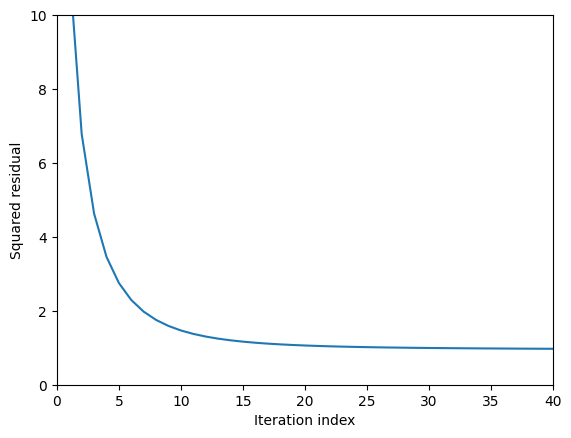

In [36]:
# Plot squared residuals of first Monte-Carlo run
plt.plot(range(number_iterations+1), models_supersmooth[0].residuals)
plt.xlim([0,40])
plt.ylim([0,10])
plt.ylabel("Squared residual")
plt.xlabel("Iteration index")